## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [1]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
prediction_features_path = f"{subdirectory}/prediction_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
prediction_ids_path = f"{subdirectory}/prediction_ids.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
prediction_features = pd.read_pickle(prediction_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
prediction_ids = pd.read_pickle(prediction_ids_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Prediction features dimensions:", prediction_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print()
print("Prediction period info:")
print(f"  From: {prediction_ids['Datum'].min()}")
print(f"  To: {prediction_ids['Datum'].max()}")
print(f"  Total predictions needed: {len(prediction_ids)}")
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (7467, 40)
Loaded Validation features dimensions: (1867, 40)
Loaded Prediction features dimensions: (1839, 40)

Loaded Training labels dimensions: (7467, 1)
Loaded Validation labels dimensions: (1867, 1)

Prediction period info:
  From: 2018-08-01 00:00:00
  To: 2019-07-30 00:00:00
  Total predictions needed: 1839

First few rows of loaded training features:
   KielerWoche_0.0  KielerWoche_1.0  is_holiday_0  is_holiday_1  Bewoelkung  \
0                1                0             1             0         6.0   
1                1                0             1             0         6.0   
2                1                0             1             0         6.0   
3                1                0             1             0         6.0   
4                1                0             1             0         6.0   

   Temperatur  Windgeschwindigkeit  Wettercode  Niederschlag  \
0     17.8375                 15.0        20.0           0.3   

## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


2026-01-04 17:56:15.235507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-04 17:56:15.558147: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-04 17:56:35.415978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-04 17:56:44.766882: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619 (2.42 KB)

 Trainable params: 539 (2.11 KB)

 Non-trainable params: 80 (320.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [3]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 65498.3438 - val_loss: 56029.3008
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65372.4414 - val_loss: 55937.2383
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 65274.7773 - val_loss: 55845.7930
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65177.9180 - val_loss: 55754.5195
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65081.3047 - val_loss: 55663.0234
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63004.6836 - val_loss: 41020.3945
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20956.1094 - val_loss: 9780.0186
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11590.7734 - val_loss: 6877.8794
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9003.6787 - val_loss: 5693.0903
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7843.4517 - val_loss: 5364.9434
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7351

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [4]:
model.save("good_weather_model.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

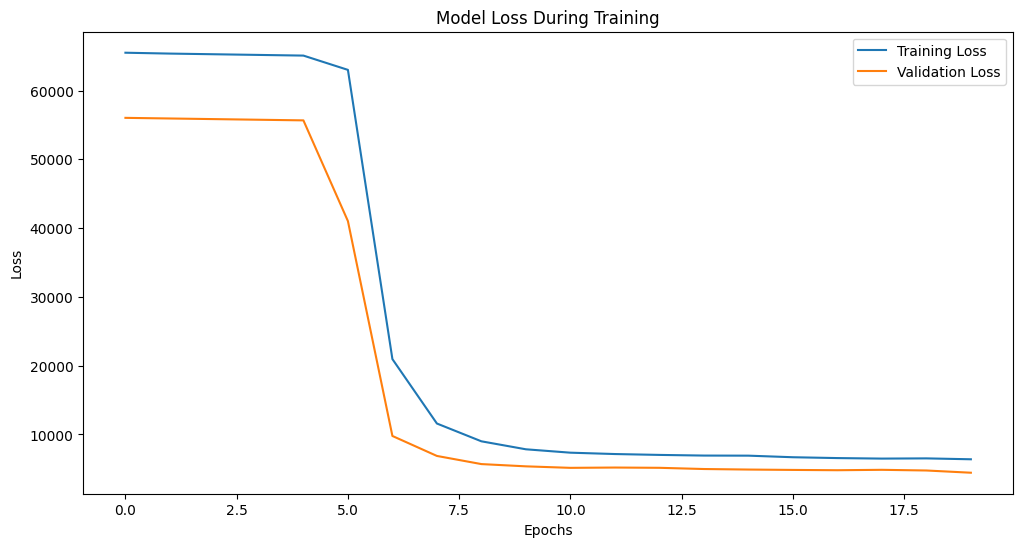

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [6]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
MAPE on the Training Data: 28.43%
MAPE on the Validation Data: 29.50%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


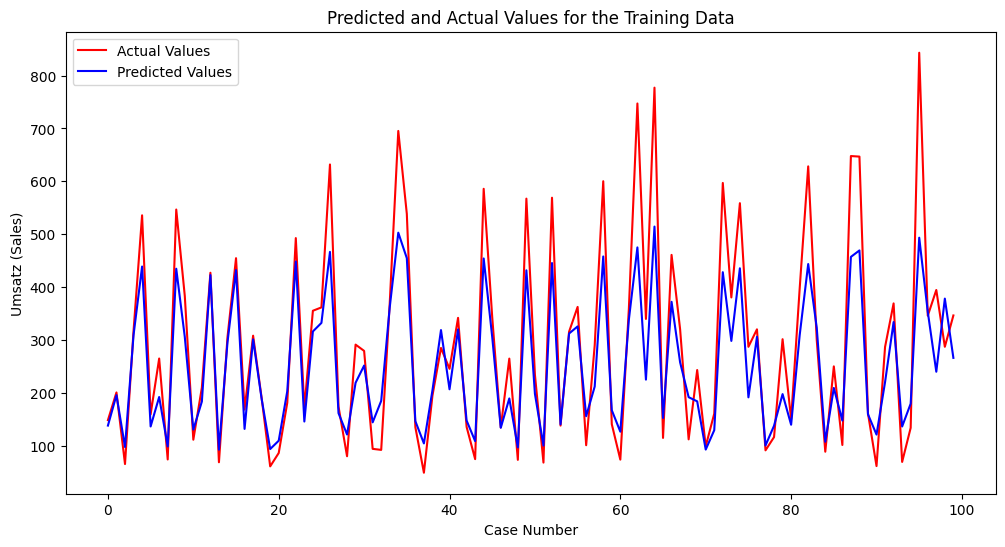

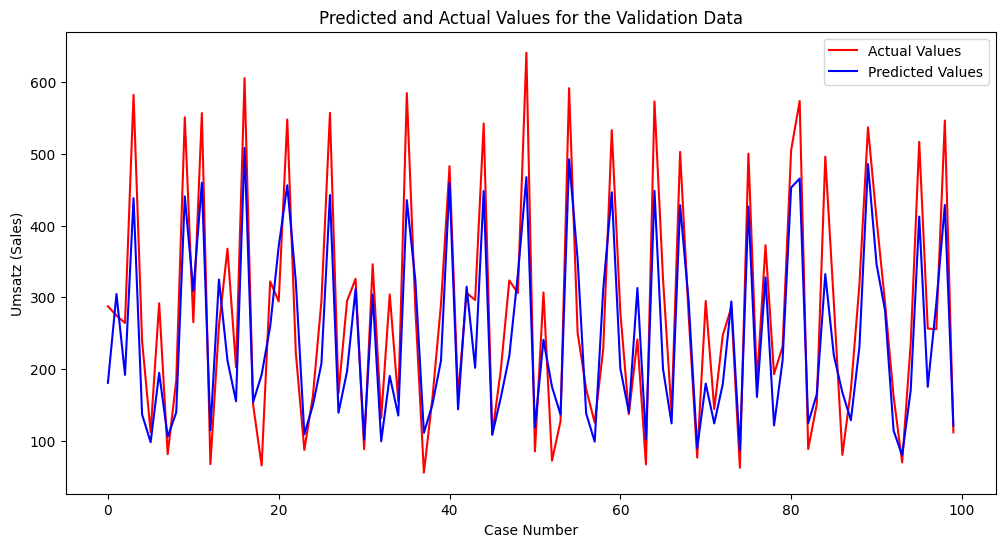

In [7]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Umsatz (Sales)')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

## Making Predictions for Future Period (Aug 2018 - Jul 2019)

Now we'll use the trained model to predict Umsatz for the period from August 1, 2018 to July 30, 2019.


In [8]:
# Make predictions for the future period
future_predictions = model.predict(prediction_features)

# Create a DataFrame with predictions and metadata
predictions_df = pd.DataFrame({
    'id': prediction_ids['id'],
    'Datum': prediction_ids['Datum'],
    'Umsatz_predicted': future_predictions.flatten()
})

# Sort by date
predictions_df = predictions_df.sort_values('Datum').reset_index(drop=True)

print(f"Generated {len(predictions_df)} predictions")
print(f"\nDate range: {predictions_df['Datum'].min()} to {predictions_df['Datum'].max()}")
print(f"\nPredicted Umsatz statistics:")
print(predictions_df['Umsatz_predicted'].describe())

# Display first and last predictions
print("\nFirst 10 predictions:")
print(predictions_df.head(10))
print("\nLast 10 predictions:")
print(predictions_df.tail(10))


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Generated 1839 predictions

Date range: 2018-08-01 00:00:00 to 2019-07-30 00:00:00

Predicted Umsatz statistics:
count    1839.000000
mean      204.632172
std       125.714584
min         1.437316
25%        99.292469
50%       165.914200
75%       301.503677
max       548.562073
Name: Umsatz_predicted, dtype: float64

First 10 predictions:
          id      Datum  Umsatz_predicted
0  1808012.0 2018-08-01        438.595062
1  1808014.0 2018-08-01         94.311989
2  1808015.0 2018-08-01        304.363129
3  1808011.0 2018-08-01        133.469391
4  1808013.0 2018-08-01        196.520767
5  1808023.0 2018-08-02        199.670029
6  1808025.0 2018-08-02        311.205963
7  1808022.0 2018-08-02        451.583008
8  1808021.0 2018-08-02        134.635376
9  1808024.0 2018-08-02         97.409332

Last 10 predictions:
             id      Datum  Umsatz_predicted
1829  1907292.0 2019-07-29        456.292938
1830  1907293.0 2019-07-29        204.989029
1831  1907291.0 2019-07-29        144.

## Export Predictions to CSV

Save the predictions to a CSV file for submission or further analysis.


In [9]:
# Export predictions to CSV
output_file = "neural_net_predictions_2018-2019.csv"
predictions_df.to_csv(output_file, index=False)

print(f"Predictions saved to: {output_file}")
print(f"\nFile contains {len(predictions_df)} predictions")
print(f"Columns: {list(predictions_df.columns)}")


Predictions saved to: neural_net_predictions_2018-2019.csv

File contains 1839 predictions
Columns: ['id', 'Datum', 'Umsatz_predicted']


## Visualize Predicted Umsatz vs Historical Data

Compare the predicted Umsatz (2018-2019) with historical years to identify trends and patterns.

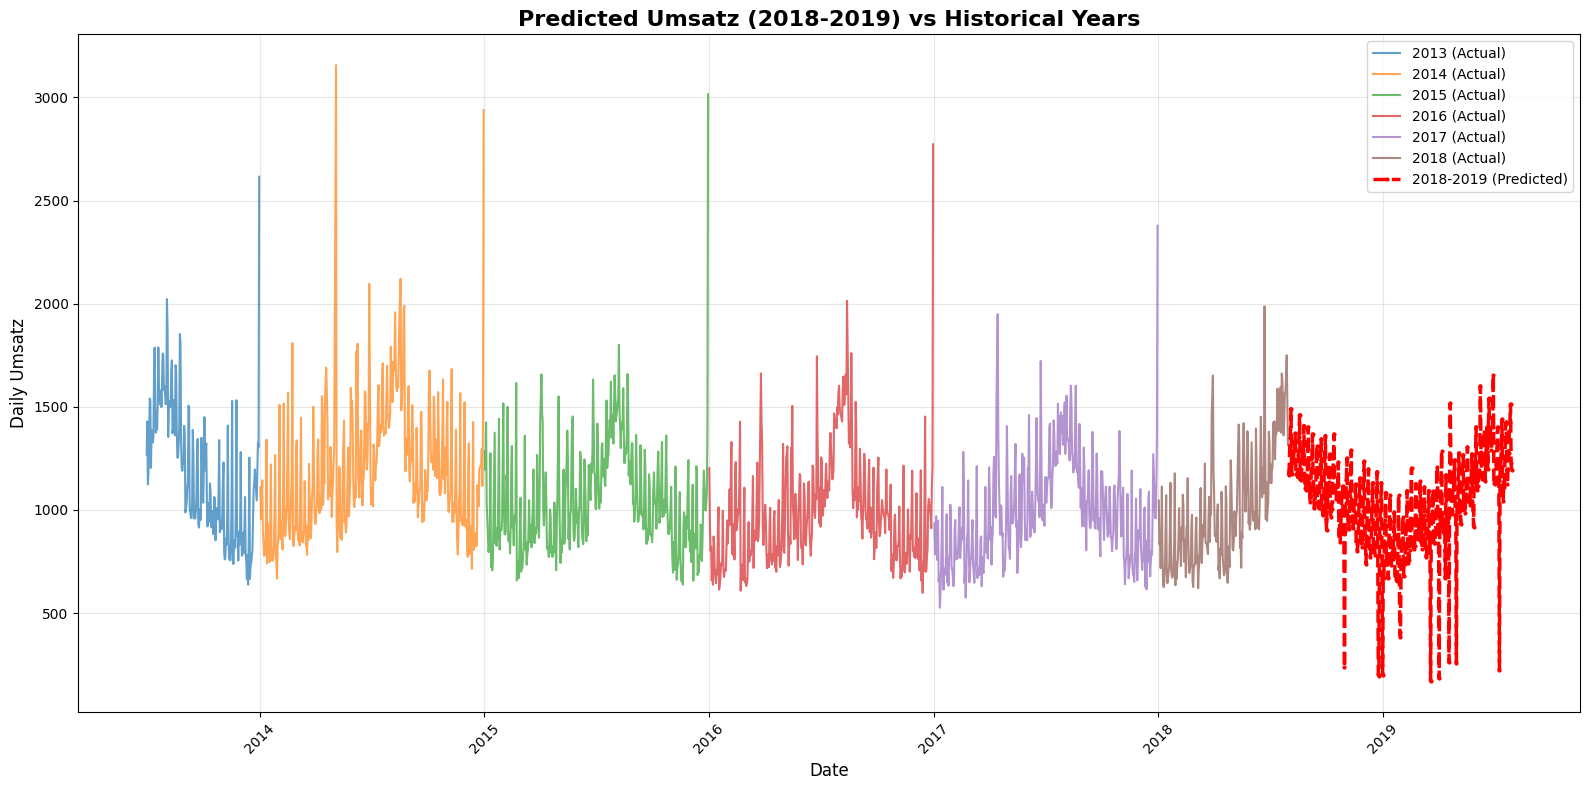


Historical Years Summary:
  2013: Mean Daily Umsatz = 1178.48, Total = 213304.61
  2014: Mean Daily Umsatz = 1188.59, Total = 424325.50
  2015: Mean Daily Umsatz = 1049.11, Total = 377678.37
  2016: Mean Daily Umsatz = 988.86, Total = 352032.95
  2017: Mean Daily Umsatz = 990.04, Total = 353443.18
  2018: Mean Daily Umsatz = 1004.86, Total = 209010.96

Predicted Period Summary (2018-2019):
  Mean Daily Umsatz = 1033.84, Total = 376318.56


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the full historical data to get actual Umsatz values
historical_data = pd.read_csv("/home/codespace/team3_goodweather-1/1_DatasetCharacteristics/processed_data/combined_data_final_imputed.csv")
historical_data['Datum'] = pd.to_datetime(historical_data['Datum'])

# Filter only rows with actual Umsatz values (exclude test data)
historical_data = historical_data[historical_data['Umsatz'].notna()].copy()

# Aggregate daily Umsatz (sum across all Warengruppe if multiple entries per day)
daily_historical = historical_data.groupby('Datum')['Umsatz'].sum().reset_index()

# Load predictions - check if predictions_df exists, otherwise load from CSV
try:
    # Try to use the predictions_df variable if it exists
    predictions_data = predictions_df.copy()
except NameError:
    # If not, load from the CSV file
    print("Loading predictions from CSV file...")
    predictions_data = pd.read_csv("neural_net_predictions_2018-2019.csv")

# Prepare predictions data
predictions_data['Datum'] = pd.to_datetime(predictions_data['Datum'])

# Check column name - it might be 'Umsatz_predicted' or just 'Umsatz'
if 'Umsatz_predicted' in predictions_data.columns:
    pred_col = 'Umsatz_predicted'
elif 'Umsatz' in predictions_data.columns:
    pred_col = 'Umsatz'
else:
    raise ValueError(f"Could not find Umsatz column. Available columns: {predictions_data.columns.tolist()}")

daily_predictions = predictions_data.groupby('Datum')[pred_col].sum().reset_index()
daily_predictions.rename(columns={pred_col: 'Umsatz_predicted'}, inplace=True)

# Create the visualization
plt.figure(figsize=(16, 8))

# Plot historical data by year
years = daily_historical['Datum'].dt.year.unique()
colors = plt.cm.tab10(range(len(years)))

for i, year in enumerate(sorted(years)):
    year_data = daily_historical[daily_historical['Datum'].dt.year == year].copy()
    # Convert dates to day of year for alignment
    year_data['day_of_year'] = year_data['Datum'].dt.dayofyear
    plt.plot(year_data['Datum'], year_data['Umsatz'], 
             label=f'{year} (Actual)', alpha=0.7, linewidth=1.5, color=colors[i])

# Plot predictions
plt.plot(daily_predictions['Datum'], daily_predictions['Umsatz_predicted'], 
         label='2018-2019 (Predicted)', linewidth=2.5, color='red', linestyle='--', marker='o', markersize=2)

plt.title('Predicted Umsatz (2018-2019) vs Historical Years', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Umsatz', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nHistorical Years Summary:")
for year in sorted(years):
    year_data = daily_historical[daily_historical['Datum'].dt.year == year]
    print(f"  {year}: Mean Daily Umsatz = {year_data['Umsatz'].mean():.2f}, Total = {year_data['Umsatz'].sum():.2f}")

print("\nPredicted Period Summary (2018-2019):")
print(f"  Mean Daily Umsatz = {daily_predictions['Umsatz_predicted'].mean():.2f}, Total = {daily_predictions['Umsatz_predicted'].sum():.2f}")